In [1]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")

#**Part 1**

In [2]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [3]:
from cirq.ops import CNOT,SWAP,X,H,rx
circuit = cirq.Circuit()

q0, q1,q2,q3,q4 = cirq.LineQubit.range(5)    #defining 5 qubits

circuit.append([H(q0),H(q1),H(q2),H(q3),H(q4)])   #applying Hadamard gate on each qubit

circuit.append([CNOT(q0,q1),CNOT(q1,q2),CNOT(q2,q3),CNOT(q3,q4)])    #applyting CNOT gates

circuit.append(SWAP(q0,q4))   #applying SWAP gate

circuit.append([rx(pi/2)(q0)])  # rotating qubit q0 by pi/2 radians around the Pauli 'X' axis

print(circuit)  #plotting circuit

0: ───H───@───────────────×───Rx(0.5π)───
          │               │
1: ───H───X───@───────────┼──────────────
              │           │
2: ───H───────X───@───────┼──────────────
                  │       │
3: ───H───────────X───@───┼──────────────
                      │   │
4: ───H───────────────X───×──────────────


#**Part 2**

In [4]:

a = cirq.NamedQubit('a')    #defining a named qubit


circuit_2 = cirq.Circuit([cirq.rx(pi / 30.0)(a) for t in range(100)])  #series of small cirq.Rx rotations
print(circuit_2)



a: ───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.0

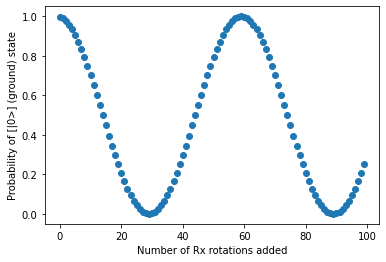

In [5]:


probs = []   #list for collecting probabilities

simulator=cirq.Simulator()

for step in simulator.simulate_moment_steps(circuit_2):
    prob = np.abs(step.state_vector()) ** 2
    probs.append(prob[0])


plt.plot(probs, 'o')
plt.xlabel("Number of Rx rotations added")
plt.ylabel("Probability of [|0>] (ground) state");